In [ ]:
!pip install pandas seaborn matplotlib


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

file_path = '/content/Dataset7.xlsx'

# Here i would load  the dataset
dataset = pd.read_excel(file_path)


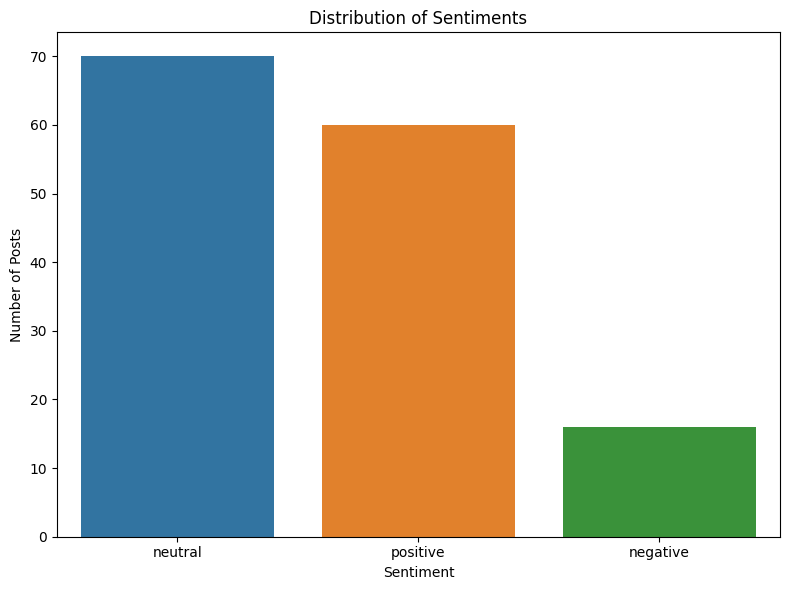

In [ ]:
# Now i need to count the number of posts for each sentiment
sentiment_distribution = dataset['Sentiment'].value_counts()

# now i need to create  a bar chart for sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.tight_layout()


plt.show()


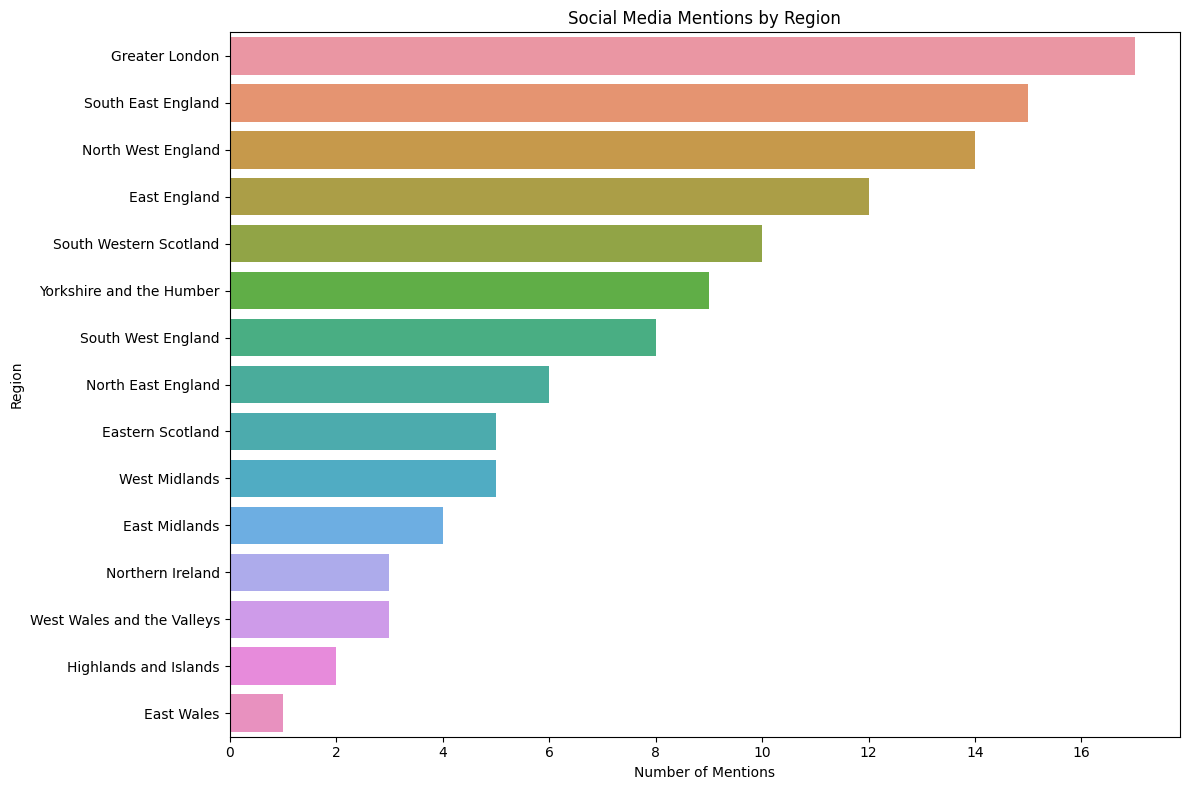

In [ ]:

# now i need to group the data by region and count the number of posts
region_distribution_dataset7 = dataset['Region'].value_counts()

# now to create a horizontal bar chart for social media mentions by region
plt.figure(figsize=(12, 8))
sns.barplot(x=region_distribution_dataset7.values, y=region_distribution_dataset7.index)
plt.title('Social Media Mentions by Region')
plt.xlabel('Number of Mentions')
plt.ylabel('Region')
plt.tight_layout()


plt.show()


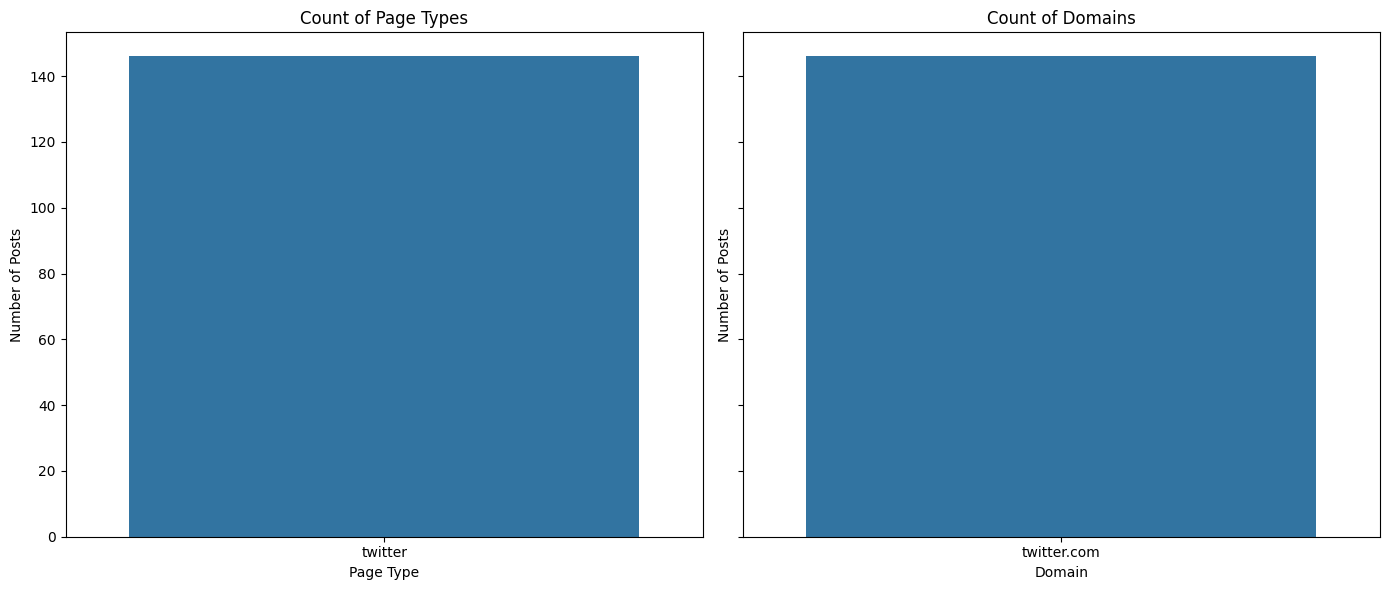

In [ ]:
# Now to Count the number of posts for each 'Page Type' and 'Domain'
page_type_count = dataset['Page Type'].value_counts()
domain_count = dataset['Domain'].value_counts()

# Setting  up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

#  here the Bar chart for 'Page Type'
sns.barplot(ax=axes[0], x=page_type_count.index, y=page_type_count.values)
axes[0].set_title('Count of Page Types')
axes[0].set_xlabel('Page Type')
axes[0].set_ylabel('Number of Posts')

#Now for the  Bar chart for 'Domain'
sns.barplot(ax=axes[1], x=domain_count.index, y=domain_count.values)
axes[1].set_title('Count of Domains')
axes[1].set_xlabel('Domain')
axes[1].set_ylabel('Number of Posts')


plt.tight_layout()
plt.show()

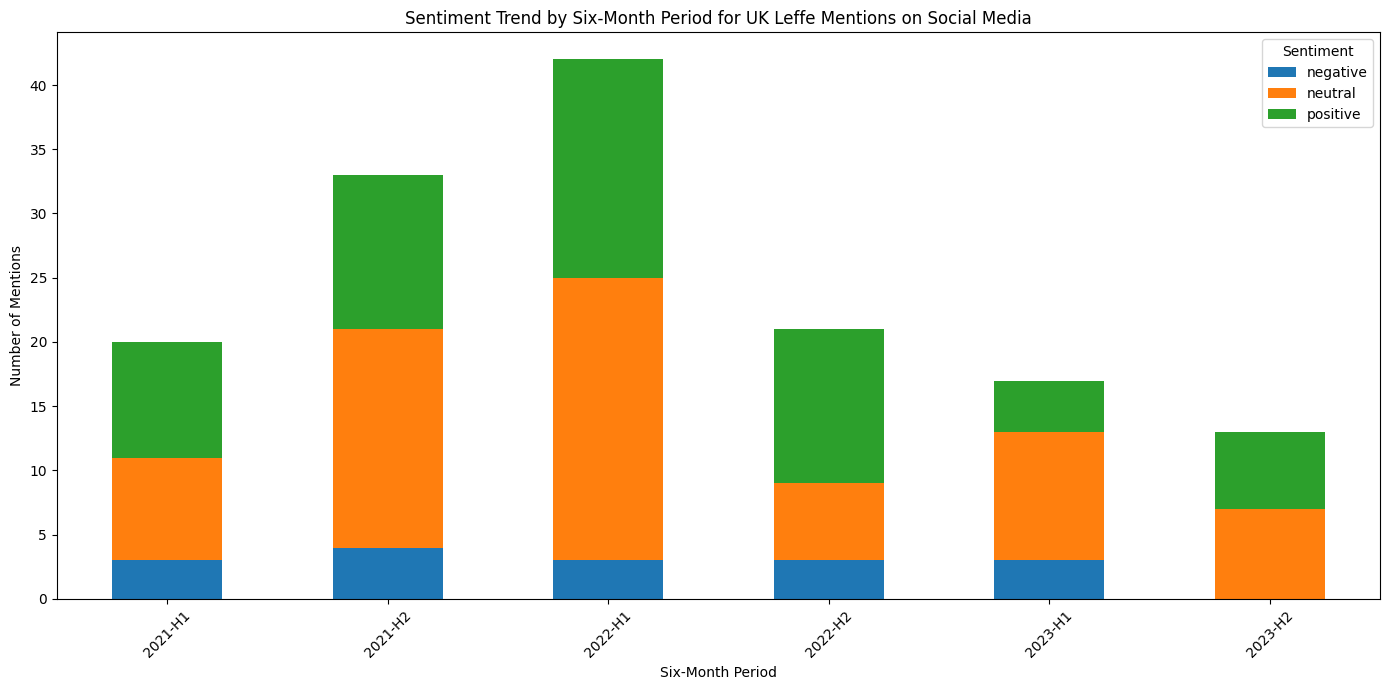

In [ ]:

# first need to convert 'Date' to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])

# now then defining  the start and end dates for the given timeline
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2023-08-31')

# Now Filtering the dataset for entries within the given timeline
timeline_data = dataset[(dataset['Date'] >= start_date) & (dataset['Date'] <= end_date)]

# Now defining  a function to get the six-month period string for each date
def get_six_month_period(d):
    if d.month <= 6:
        return f'{d.year}-H1'
    else:
        return f'{d.year}-H2'

# Applying the function to the 'Date' column to create a 'Six-Month Period' column
timeline_data['Six-Month Period'] = timeline_data['Date'].apply(get_six_month_period)

# Grouping the data by the six-month period and sentiment
six_month_period_sentiment = timeline_data.groupby(['Six-Month Period', 'Sentiment']).size().unstack(fill_value=0)

# Plotting the sentiment trend for each six-month period
six_month_period_sentiment.plot(kind='bar', stacked=True, figsize=(14, 7), title='Sentiment Trend by Six-Month Period for UK Leffe Mentions on Social Media')
plt.xlabel('Six-Month Period')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()


plt.show()

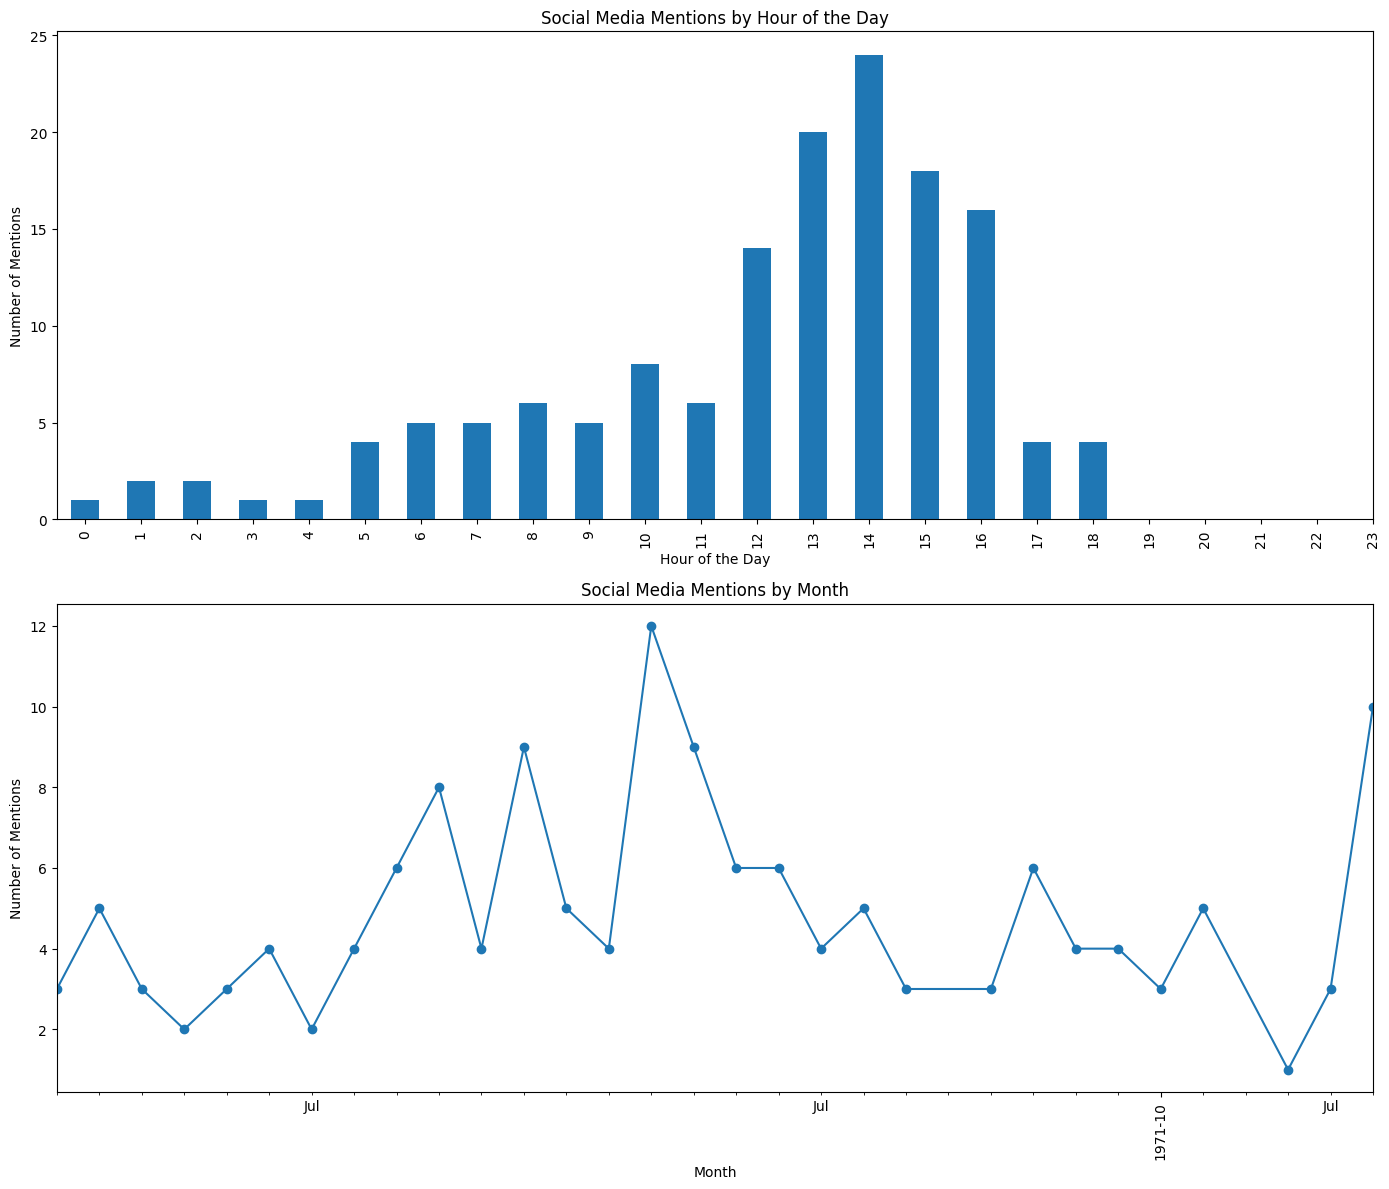

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


file_path = '/content/Dataset7.xlsx'

# Here i would load  the dataset
dataset = pd.read_excel(file_path)


# Preparing  the data
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Hour'] = dataset['Date'].dt.hour
dataset['Month'] = dataset['Date'].dt.to_period('M')

# Aggregating the data
hourly_distribution = dataset.groupby('Hour').size()
monthly_distribution = dataset.groupby('Month').size()

# Seting  up the figure
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Creating Bar chart for hourly mentions
hourly_distribution.plot(kind='bar', ax=axes[0])
axes[0].set_title('Social Media Mentions by Hour of the Day')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Number of Mentions')
axes[0].set_xticks(range(0, 24))
axes[0].set_xticklabels(range(0, 24))

#  creating Line chart for monthly mentions
monthly_distribution.plot(kind='line', ax=axes[1], marker='o')
axes[1].set_title('Social Media Mentions by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Mentions')
axes[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()




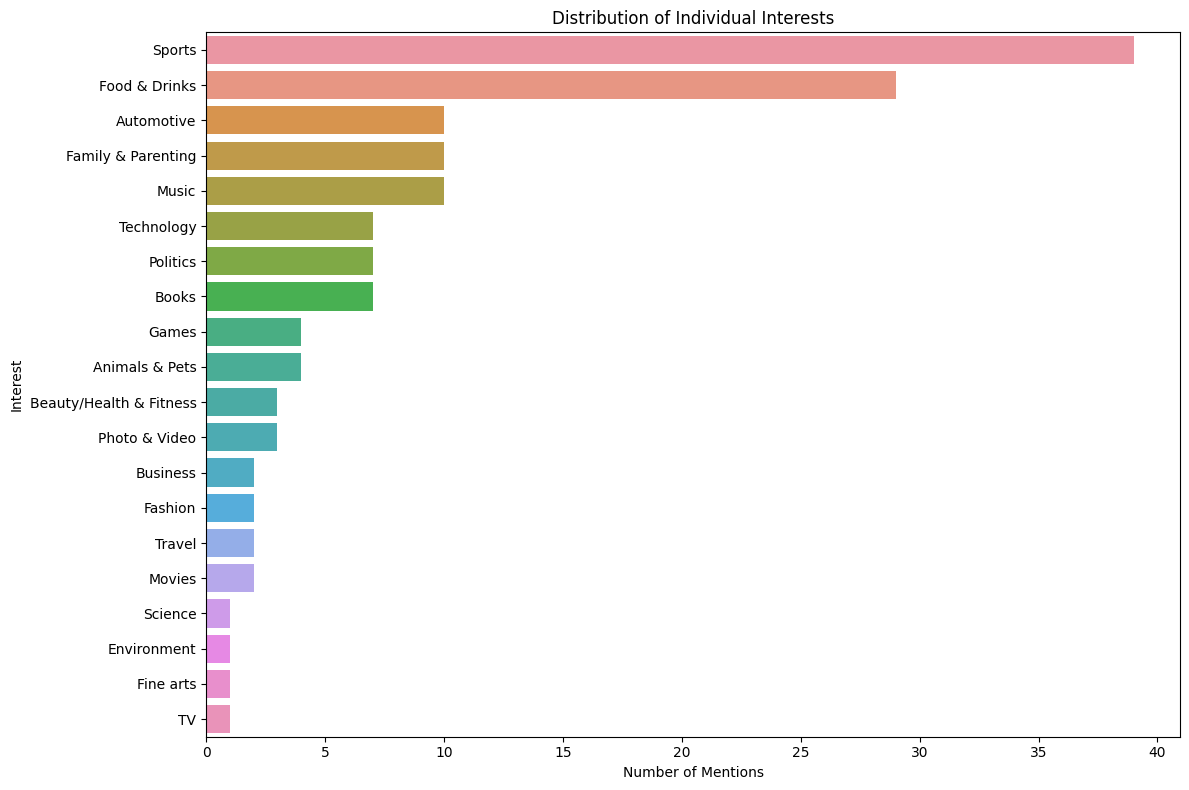

In [ ]:
from collections import Counter
# Spliting  the 'Interest' column into individual interests and count the occurrences
interests = dataset['Interest'].dropna().str.split(', ')
flattened_interests = [item for sublist in interests for item in sublist]
interest_counts = Counter(flattened_interests)

# Converting the counter to a dataframe for easier plotting
interest_df = pd.DataFrame.from_dict(interest_counts, orient='index', columns=['Count'])

# Sorting the dataframe by count
interest_df = interest_df.sort_values(by='Count', ascending=False)

# Creating a bar chart for the interest distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=interest_df['Count'], y=interest_df.index)
plt.title('Distribution of Individual Interests')
plt.xlabel('Number of Mentions')
plt.ylabel('Interest')
plt.tight_layout()


plt.show()